# Chapter 3 - Regression Models
## Segment 2 - Multiple linear regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [3]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

#### (Multiple) linear regression on the enrollment data

In [4]:
address = '../Data/enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

year  roll  unem  hgrad   inc
0     1  5501   8.1   9552  1923
1     2  5945   7.0   9680  1961
2     3  6629   7.3   9731  1979
3     4  7556   7.5  11666  2030
4     5  8716   7.0  14675  2112

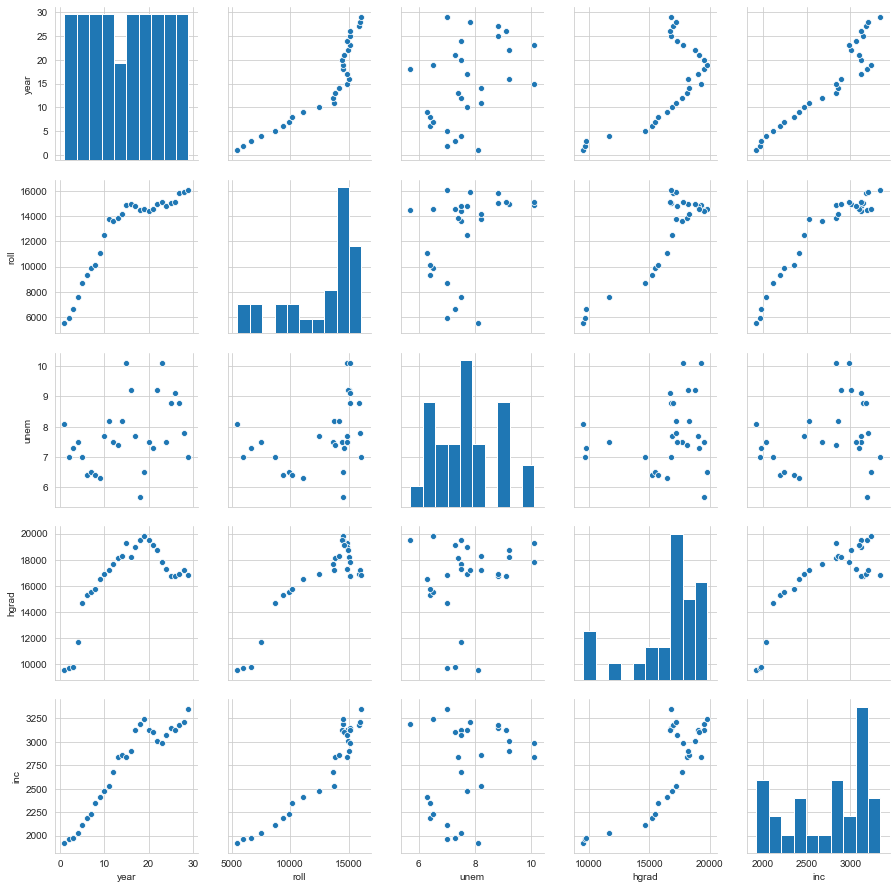

In [6]:
sb.pairplot(enroll)

In [5]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [11]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

### Checking for missing values

In [7]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [8]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723


/Users/anthonyle/.conda/envs/ML_projects/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
